In [1]:
from ast import literal_eval
import glob2
import pandas as pd
import numpy as np
import json
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
top = pd.read_csv('label_top.csv', encoding='utf-8')
top

,image_id,image_name,image_height,image_width,top_cate,top_len,top_mat
0,703911,(116)IMG_1.jpg,1066,800,블라우스,긴팔,우븐
1,703912,(117)IMG_1.jpg,1066,800,블라우스,긴팔,우븐
2,703914,(119)IMG_1.jpg,600,800,블라우스,긴팔,우븐
3,703917,(122)IMG_1.jpg,1066,800,블라우스,긴팔,우븐
4,703918,(123)IMG_1.jpg,1066,800,블라우스,긴팔,우븐
...,...,...,...,...,...,...,...
58135,1267719,20201117_001727_504-158884201120506600_1817439...,1066,800,티셔츠,7부소매,저지
58136,1267826,20201117_001824_500번 나나린넨통팬츠-15888456106645400...,1066,800,티셔츠,반팔,저지
58137,1249213,20201117_231753_(SALE)디나-159161936189666000_42...,1066,800,티셔츠,반팔,우븐
58138,1270277,20201117_234317_랑i방 쎄미 배기팬츠-159903239298905600...,1066,800,셔츠,긴팔,우븐


In [3]:
df_top = pd.get_dummies(data = top, columns = ['top_cate', 'top_len', 'top_mat'])
df_top

,image_id,image_name,image_height,image_width,top_cate_니트웨어,top_cate_브라탑,top_cate_블라우스,top_cate_셔츠,top_cate_탑,top_cate_티셔츠,...,top_mat_우븐,top_mat_울/캐시미어,top_mat_자카드,top_mat_저지,top_mat_코듀로이,top_mat_트위드,top_mat_패딩,top_mat_퍼,top_mat_플리스,top_mat_헤어 니트
0,703911,(116)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,703912,(117)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,703914,(119)IMG_1.jpg,600,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,703917,(122)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,703918,(123)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58135,1267719,20201117_001727_504-158884201120506600_1817439...,1066,800,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
58136,1267826,20201117_001824_500번 나나린넨통팬츠-15888456106645400...,1066,800,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
58137,1249213,20201117_231753_(SALE)디나-159161936189666000_42...,1066,800,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
58138,1270277,20201117_234317_랑i방 쎄미 배기팬츠-159903239298905600...,1066,800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_top

,image_id,image_name,image_height,image_width,top_cate_니트웨어,top_cate_브라탑,top_cate_블라우스,top_cate_셔츠,top_cate_탑,top_cate_티셔츠,...,top_mat_우븐,top_mat_울/캐시미어,top_mat_자카드,top_mat_저지,top_mat_코듀로이,top_mat_트위드,top_mat_패딩,top_mat_퍼,top_mat_플리스,top_mat_헤어 니트
0,703911,(116)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,703912,(117)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,703914,(119)IMG_1.jpg,600,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,703917,(122)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,703918,(123)IMG_1.jpg,1066,800,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58135,1267719,20201117_001727_504-158884201120506600_1817439...,1066,800,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
58136,1267826,20201117_001824_500번 나나린넨통팬츠-15888456106645400...,1066,800,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
58137,1249213,20201117_231753_(SALE)디나-159161936189666000_42...,1066,800,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
58138,1270277,20201117_234317_랑i방 쎄미 배기팬츠-159903239298905600...,1066,800,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
from keras.preprocessing import image
from tqdm import tqdm

In [6]:
reconstructed_model = keras.models.load_model("model_top.h5")

In [75]:

train_image = []
for i in tqdm(range(3000, 4000)):
    img = image.load_img('C:/img/'+df_top['image_name'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 1000/1000 [00:10<00:00, 98.39it/s]


In [67]:
print(len(train_image))

500


In [76]:
X = np.array(train_image)
X.shape

(1000, 400, 400, 3)

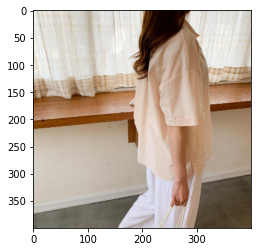

In [77]:
plt.imshow(X[1])

In [78]:
a = df_top.drop(['image_id', 'image_name', 'image_height', 'image_width'], axis=1)[3000:4000]
y = np.array(a)
len(y)

1000

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [80]:
print(X_train.shape)
print(y_train.shape)

(900, 400, 400, 3)
(900, 38)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
reconstructed_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
15/15 [==============================] - 288s 18s/step - loss: 0.2172 - accuracy: 0.0267 - val_loss: 0.1983 - val_accuracy: 0.0000e+00

In [ ]:
img = image.load_img('C:/img2/(23)IMG_1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
prob = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(prob[0])[:-4:-1]
top_3.tolist()

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

In [94]:
from keras.models import load_model

reconstructed_model.save('model_top.h5')
print('saved')

saved


In [91]:
def count_correct_result(list, result):
    answer = 0
    list_answer = []
    style_list = list[0:7].tolist()
    len_list = list[7:13].tolist()
    mat_list = list[13: 38].tolist()
    list_answer.append(style_list.index(max(style_list)))
    list_answer.append(len_list.index(max(len_list)) + 7)
    list_answer.append(mat_list.index(max(mat_list)) + 13)
    for i in result:
        if i in list_answer:
            answer += 1
    print(list_answer)
    return answer

In [92]:
def real_answer(image_name):
    count = -4
    answer = []
    temp_df = df_top[df_top['image_name'] == image_name]
    for i in temp_df.columns:
        if count >= 0 and int(temp_df[i].values[0]) == 1:
            answer.append(count)
        count += 1
    print(answer)
    return answer

In [9]:
from random import randint
import os.path
from tqdm import tqdm

In [32]:
reconstructed_model = keras.models.load_model("model_top.h5")

[[0.250557541847229,
  0.024436652660369873,
  0.45895853638648987,
  0.24229949712753296,
  0.03473830223083496,
  0.0922454297542572,
  0.048743993043899536,
  0.08543038368225098,
  0.7074280977249146,
  0.09583154320716858,
  0.1366976499557495,
  0.02122974395751953,
  0.03222218155860901,
  0.020163297653198242,
  0.013485223054885864,
  0.218113511800766,
  0.0355762243270874,
  0.014504104852676392,
  0.0459115207195282,
  0.03166157007217407,
  0.014717906713485718,
  0.01902294158935547,
  0.018652647733688354,
  0.014844566583633423,
  0.031763315200805664,
  0.00996580719947815,
  0.11605212092399597,
  0.062165290117263794,
  0.5305594801902771,
  0.1158197820186615,
  0.019915878772735596,
  0.03750103712081909,
  0.012842506170272827,
  0.01938202977180481,
  0.011497467756271362,
  0.012213706970214844,
  0.01201888918876648,
  0.027957767248153687]]

In [93]:
img = image.load_img('C:/img/(116)IMG_1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
print(reconstructed_model.predict(img.reshape(1,400,400,3))[0])
print(count_correct_result(reconstructed_model.predict(img.reshape(1,400,400,3))[0], real_answer("(116)IMG_1.jpg")))

[1.8582836e-01 6.2936544e-04 2.7314627e-01 2.4015278e-01 1.6011536e-01
 2.0058784e-01 7.4015558e-03 2.5728846e-01 2.6323068e-01 1.5089893e-01
 3.7253433e-01 6.7925453e-04 2.9247105e-03 4.9281120e-04 3.2016635e-04
 2.2386789e-01 1.0577738e-03 5.9667528e-03 1.7626342e-01 9.9390745e-04
 3.1632185e-04 4.4164062e-04 5.6537986e-04 3.4990907e-04 1.1183619e-03
 2.6795268e-04 1.5452859e-01 7.1516931e-03 3.2402557e-01 6.6237450e-03
 3.3290684e-03 1.5683025e-01 4.1437149e-04 4.4539571e-04 2.5117397e-04
 3.0437112e-04 3.6191940e-04 8.9743733e-04]
[2, 8, 28]
[2, 10, 28]
2


In [86]:
answer = 0
sum = 0
for i in tqdm(range(0, 100)):
    try:
        name = df_top['image_name'][randint(1, 5000)]
        if os.path.isfile('C:/img/' + name):
            img = image.load_img('C:/img/' + name,target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        answer += count_correct_result(reconstructed_model.predict(img.reshape(1,400,400,3))[0], real_answer(name))
        sum += 3
    except:
        continue
print("Accuracy = " + str(answer / sum))

100%|██████████| 100/100 [00:15<00:00,  6.39it/s]

Accuracy = 0.35
